# Working with Image Data

In this notebook we're going to illustrate some simple examples of working with image data in Python.  

Image analysis tasks like trimming, normalizing, and segmentation are commonly used in the biological sciences in the context of phenotyping, microscopy, object tracking, etc. 

The examples here illustrate simple functions built into matplotlib and numpy. For more sophisticated image analysis tools check out the [scikit-image](https://scikit-image.org/) library.

## Data 

We'll use two example images which can be found on the course wiki

* [chesterdog.jpg](https://raw.githubusercontent.com/Bio724D/Bio724D_2023_2024/main/data/chesterdog.jpg)
* [yeast_colonies.jpg](https://raw.githubusercontent.com/Bio724D/Bio724D_2023_2024/main/data/chesterdog.jpg)

Download these into your working directory.

## Libraries

In [1]:
import numpy as np  # numpy provides support for arrays
from matplotlib import pyplot as plt  # the pyplot sublibrary is the default plotting interface
from matplotlib import image  # the image sublibrary provides support for loading image data

## Reading the images

In [2]:
chester = image.imread("chesterdog.jpg")
colonies = image.imread("yeast_colonies.jpg")

When using the matplotlib image library, images are loaded as numpy arrays.  

In [3]:
type(chester)

numpy.ndarray

Let's start by checking out the shape of these arrays we got back so we understand their dimensions.

In [4]:
chester.shape

(556, 605, 3)

In [5]:
colonies.shape

(184, 286)

Notice that the object `chester` has three dimensions, while `colonies` only has two. This is because the image file `chesterdog.jpg` is a color image with red, green, and blue (RGB) data for each pixel in the image.  `yeast_colonies.jpg` is a grayscale image with only a single value per pixel.

## Plotting images

Having loaded the images we can now plot them as follows using the `imshow()` function defined in the pyplot sublibrary of matplotlib:

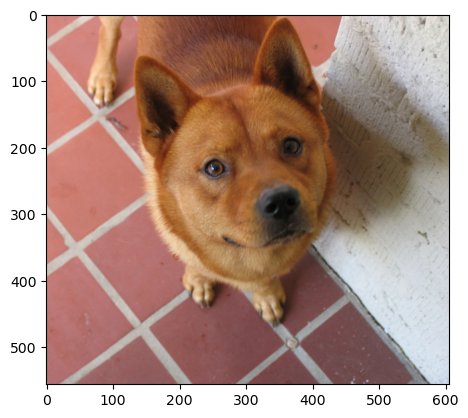

In [6]:
plt.imshow(chester)

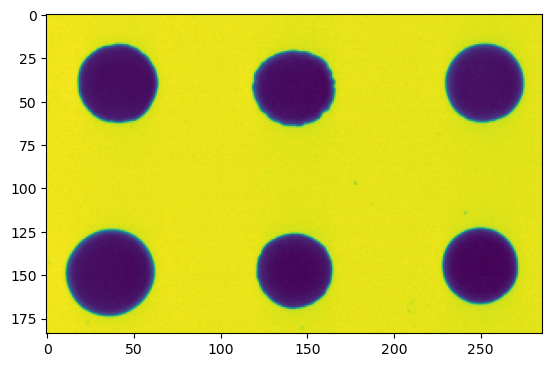

In [7]:
plt.imshow(colonies)

What's going on wiht our second image? `imshow` defaults to drawing images in color. To specify that we want to show a grayscale image we need to specify the "colormap" (cmap) as "gray".  

We also need to set `vmin` and `vmax` which give the minimum and maximum values of the pixel intensity. Since this is an 8-bit grayscale image, the minimum pixel intensity is 0 (pure black) and the maximum is 255 (pure white).

Note that when an input array is 3D, like `chester`, we don't need to set the `vmin` and `vmax` because matplotlib automatically assumes that the array being plotted is an RGB image and sets appropriate limits based on the data type in the array.

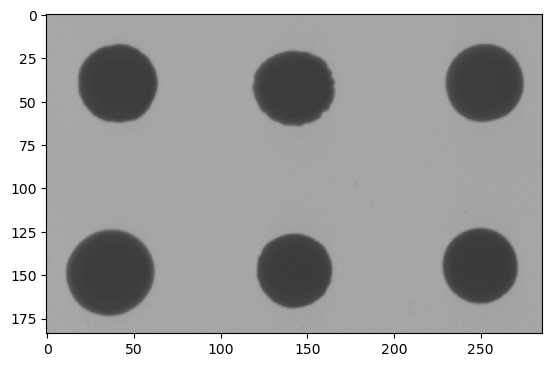

In [8]:
plt.imshow(colonies, cmap="gray", vmin=0, vmax=255)

Try plotting the colonies image without specifying `vmin` and `vmax`.  How does this differ from the image above? In the absence of a specified `vmin` and `vmax` matplotlib will "normalize" it's color map to the minimum and maximum values found in the array (see the [matplotlib docs on color normalization](https://matplotlib.org/stable/users/explain/colors/colormapnorms.html#colormapnorms) for more info).

# Basic image manipulation

Let's start with some basic image manipulation tasks, like extracting a region of interest from an image.

These basic manipulation tasks are achieved through simple indexing of the array.  Notice that for the `chester` image there are three axes we need to consider. The first axis represents rows of pixels (y-direction), the second axis represents columns (x-direction), and the third represents color "channels" or layers (RGB).

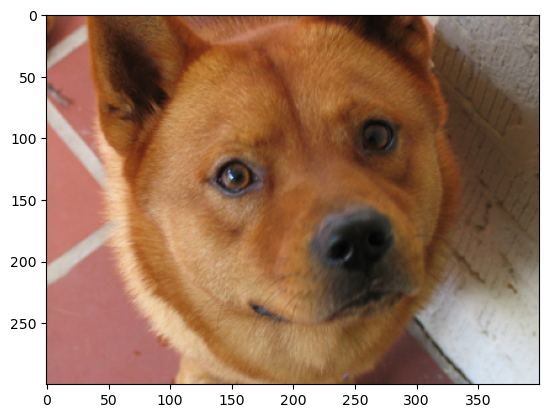

In [9]:
# extract a (300,400) sub-array, all 3 color layers
plt.imshow(chester[100:400, 100:500, :])

We can flip the image in the vertical direction by taking the rows in reverse order using a negative step index

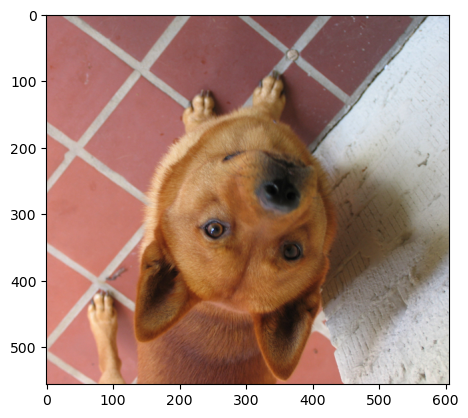

In [10]:
# Reverse one of the axes, notice the change in orientation
plt.imshow(chester[::-1, :, :])

We can rotate the image by transposition.  With a 2D array, transposition swaps rows and columns. Higher dimensional tranposition requires us to be explicit about what order or rearrangement want the dimensions in. Here we swap rows and columns but leave the color information unchanged.

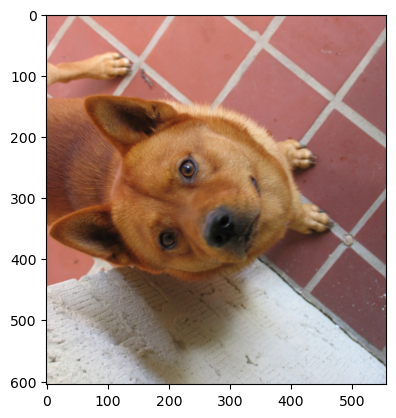

In [11]:
# Transpose the x,y axes
plt.imshow(np.transpose(chester, axes = [1,0,2]))

If we want to edit the image in place, we can replace values in memory. Here we copy the original image first so we still have a copy of the unedited version of chester.

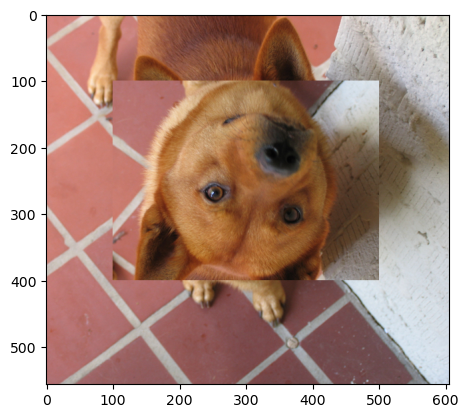

In [12]:
# Flip  a small section of the image "in place"

chester2 = chester.copy()  # make a copy of the array so we don't change original data

chester2[100:400, 100:500, :] = chester2[400:100:-1, 100:500, :]

plt.imshow(chester2)

Up to now we've been focused on the row and column data of the RGB image, but we can also manipulate the color channels (layers).

For example, we can extract each layer separately:

In [13]:
# extract the red, green, and blue channels separately

red_channel = chester[:,:,0]
green_channel = chester[:, :, 1]
blue_channel = chester[:, :, 2]

We can then plot just a single channel:

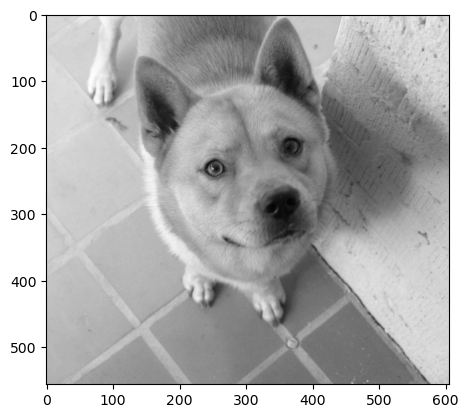

In [14]:
# Plot just the red channel data

plt.imshow(red_channel, cmap="gray", vmin=0, vmax=255)

Or all channels in a multi-plot layout:

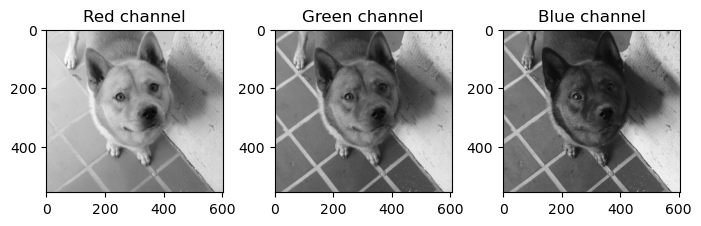

In [15]:
# plot all 3 channels side-by-side

fig, (sub1, sub2, sub3) = plt.subplots(nrows=1, ncols=3, figsize=(7,21))

sub1.imshow(red_channel, cmap="gray", vmin=0, vmax=255)
sub1.set_title("Red channel")

sub2.imshow(green_channel, cmap="gray", vmin=0, vmax=255)
sub2.set_title("Green channel")

sub3.imshow(blue_channel, cmap="gray", vmin=0, vmax=255)
sub3.set_title("Blue channel")

plt.tight_layout()  # ensures subaxes are layed out nicely



We can even manipulate the color channel information directly, or re-order the channels as shown below:

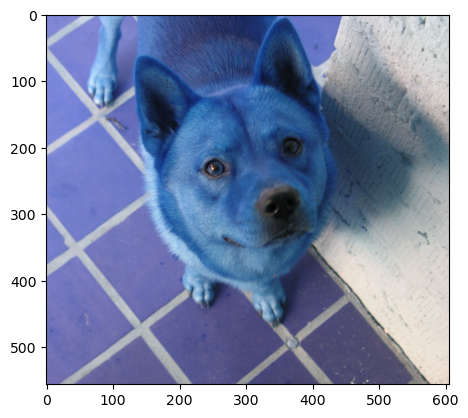

In [16]:
# create a new 3D array by re-stacking the color channels in a different order
psychedelic_chester = np.stack((blue_channel,  green_channel, red_channel), axis=2)

plt.imshow(psychedelic_chester)

# Combining manipulation and quantitation

In this second example we'll illustrate how to get quantititative information from images using a simple segmenetation and pixel counting procedure.

Our goal is the analyze the area (number of pixels) of each colony in the image below.

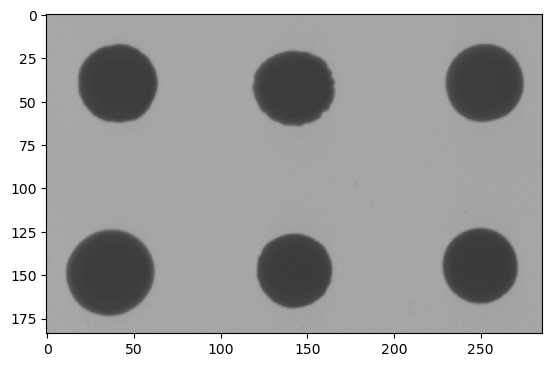

In [17]:
plt.imshow(colonies, cmap="gray", norm=None, vmin=0, vmax=255)

To accomplish this we're going to chop this single image into multiple sub-images (one for each colony) and analyze each subimage separately.

For simplicitly we'll cut into 100 x 100 pixel sub-images using the boundaries illustrated below.  We'll specify the positions of the subimages by giving the y- and x- start positions.

In [18]:
# Cutting out multiple slices of the image, each representing a colony

ystarts= [0, 100]
xstarts = [0, 100, 200]

In [19]:
# these tuples are the upper left corners of each sub-image we'll extract
for y in ystarts:
    for x in xstarts:
        print(x, y)

0 0
100 0
200 0
0 100
100 100
200 100


The code below illustrates each of sub-images we're extracting.  Note that some of the sub-images go beyond the 'border' of the array.  If we index beyond the maximum index, Python simply truncates at the maximum.

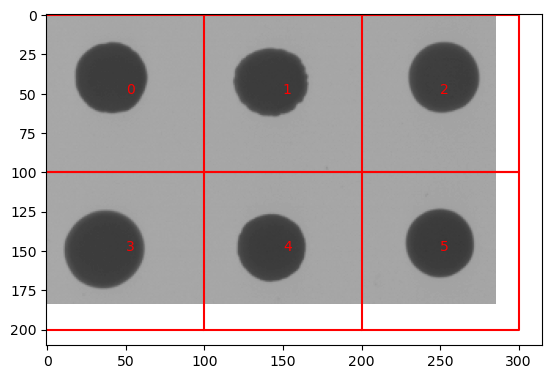

In [20]:
# let's draw the boundaries on the image

plt.imshow(colonies, cmap="gray", norm=None, vmin=0, vmax=255)

ct = 0
for y in ystarts:
    for x in xstarts:
        # plot the boundaries of the image rectangles
        ys = [y, y, y + 100, y + 100]
        xs = [x, x + 100, x + 100, x]
        plt.plot(xs, ys, color="red")
        # add some text numbering the sub-images
        plt.text(x + 50, y + 50, f"{ct}", color="red")
        ct += 1

In [21]:
# extract each subimage into a list

spots = []

for y in ystarts:
    for x in xstarts:
        spot = colonies[y:y+100, x:x+100]
        spots.append(spot)

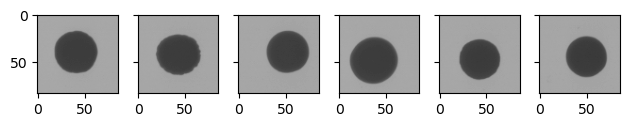

In [22]:
# plot all the individual subimages
# notice that the different subimages are not the same size
# however, this doesn't matter for our analysis to follow
# as long as each sub-image fully contains the colony we want to analyze

fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True)

ct = 0
for spot in spots:
    axes[ct].imshow(spot, cmap="gray", vmin=0, vmax=255)
    ct += 1


plt.tight_layout()  

Here's what a single one of our sub-images looks like:

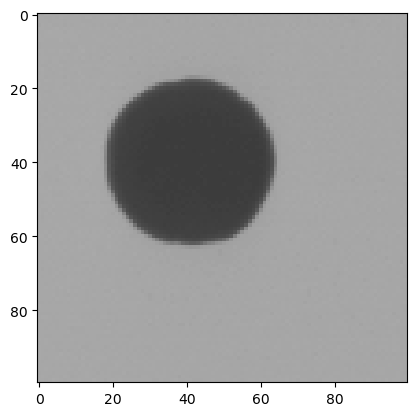

In [23]:
plt.imshow(spots[0], cmap="gray", vmin=0, vmax=255)

If we plot a histogram of the pixel values in the sub-image we get a bimodal distribution as shown below. The larger values represent "brighter" pixels (i.e. the light grey background) while the lower mode represents pixels in the colony itself.  It is those colony pixels that we want to count to estimate the size of each colony.

(0.0, 255.0)

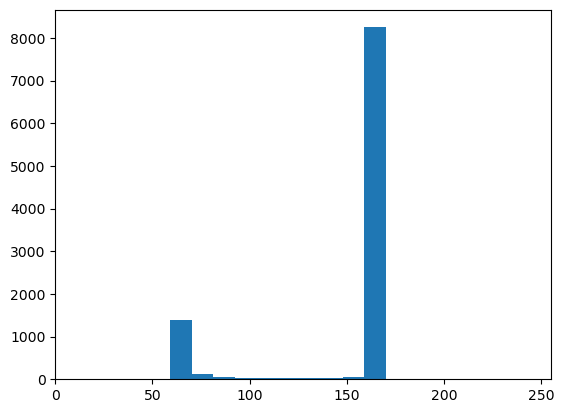

In [24]:
# create a histogram of the pixel intensity data in the first spot

plt.hist(spots[0].ravel())  # ravel() turns the 2-D array into a 1-D vector
plt.xlim(0,255)

When doing image segmentation it is common to binarize an image into "background" vs "foreground" pixels. Here the foreground of interest are the pixels in each colony. 

We can accomplish this by turning our integers array into an array of Booleans (True/False) values where True indicates a foreground pixel.

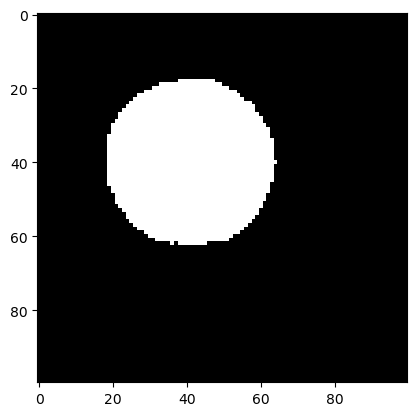

In [25]:
# binarize the image by setting all pixels with values below 125 to have True, all others to False
plt.imshow(spots[0] < 125 ,cmap="gray", norm=None, vmin=0, vmax=1)

In [26]:
# calculate the area of the colony as the number of pixels that are "True"

area0 = np.sum(spots[0]  < 125)
area0  

1635

If we want to automate this process for all colonies we can setup a for-loop:

In [27]:
# automate this process for all the spots

areas = []
binary_spots = []

for spot in spots:
    bin_spot = spot < 125
    binary_spots.append(bin_spot)
    areas.append(np.sum(bin_spot))

Here are the calculated areas for each colony:

In [28]:
areas

[1635, 1611, 1591, 1974, 1473, 1485]

And here's a depiction of each segmented sub-image:

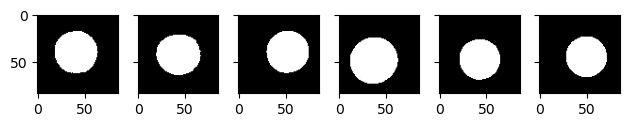

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True)

ct = 0
for spot in binary_spots:
    axes[ct].imshow(spot, cmap="gray", vmin=0, vmax=1)  # note change of vmax
    ct += 1


plt.tight_layout()  

Instead of displaying the colonies in the order extracted from the starting image, we can plot them in decreadsing order of their size.

In [30]:
areas

[1635, 1611, 1591, 1974, 1473, 1485]

The numpy function `argsort` will give the indices that you would take the elements of an array to return them in sorted order.  Note that default sort order is from smallest to largest.

In [31]:
np.argsort(areas)

array([4, 5, 2, 1, 0, 3])

Using argsort then we can plot the segmented images from largest to smallest (after reversing the sort order)

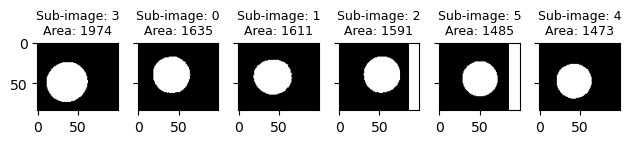

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True)

ct = 0
for idx in reversed(np.argsort(areas)):
    axes[ct].imshow(binary_spots[idx], cmap="gray", vmin=0, vmax=1)  # note change of vmax
    axes[ct].set_title(f"Sub-image: {idx}\nArea: {areas[idx]}", fontsize=9)
    ct += 1


plt.tight_layout()  